## Load the libraries

In [63]:
import numpy as np #linear algebra
import pandas as pd #data processing

## Load the data

In [64]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [65]:
#Examine the two data frames
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exporatory Data Analysis

Note the "survived" column is missing in the test data frame. The goal of this model is to predict the survival 
probability of a person with the given feature. Preliminary analysis provides information in making decisions on the model utilized.

In [67]:
#Look to understand the data before throwing it into predictive model
print('Total number of passengers in the training data:', len(train))
print('Number of passengers in the training data who survived:', len(train[train['Survived'] == 1]))

Total number of passengers in the training data: 891
Number of passengers in the training data who survived: 342


In [68]:
print('% of men who survived', 100*np.mean(train['Survived'][train['Sex'] == 'male']))
print('% of women who survived', 100*np.mean(train['Survived'][train['Sex'] == 'female']))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


In [69]:
print('% of passengers who survived in first class', 100*np.mean(train['Survived'][train['Pclass'] == 1]))
print('% of passengers who survived in second class', 100*np.mean(train['Survived'][train['Pclass'] == 2]))
print('% of passengers who survived in third class', 100*np.mean(train['Survived'][train['Pclass'] == 3]))


% of passengers who survived in first class 62.96296296296296
% of passengers who survived in second class 47.28260869565217
% of passengers who survived in third class 24.236252545824847


In [70]:
print('% of children who survived', 100*np.mean(train['Survived'][train['Age'] < 18]))
print('% of adults who survived', 100*np.mean(train['Survived'][train['Age'] > 18]))

% of children who survived 53.98230088495575
% of adults who survived 38.26086956521739


# Data Pre-Processing

A decision tree model is used. 

Account for non numeric features

In [71]:
#for every value in the column if it is a male then replace with 1, otherwise replace with 0
#male = 1, female = 0
train['Sex'] = train['Sex'].apply(lambda x: 1 if x =='male' else 0)

Account for missing values

In [72]:
#the "fillna" function replaces every NaN entry with the given input (the mean of the column in our case)
train['Age'] = train['Age'].fillna(np.mean(train['Age']))
train['Fare'] = train['Fare'].fillna(np.mean(train['Age']))

Omit Irrelevant Columns

In [73]:
# for simplicity, we omit several attributes
train = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', "Fare"]]

In [74]:
#x is the featured without the labels
#y is the labels, i.e. the answers
x = train.drop('Survived', axis =1)
y = train['Survived']

# Predict

To evaluate the model we need to split the training dataset into a train dataset and an evaluation dataset (for validation).

In [75]:
#use the "train_test_split" from sklearn module for this simple machine learning task
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Train the model

In [76]:
#Import decision tree classifier model from sklearn library
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Evaluate the model

In [77]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, classifier.predict(x_train)))
print('Validation accuracy...', accuracy_score(y_test, classifier.predict(x_test)))

Training accuracy... 0.9798657718120806
Validation accuracy... 0.7288135593220338


This large difference between the training score and vlaidation score suggests our model overfits, i.e. more so memorizing the training data.

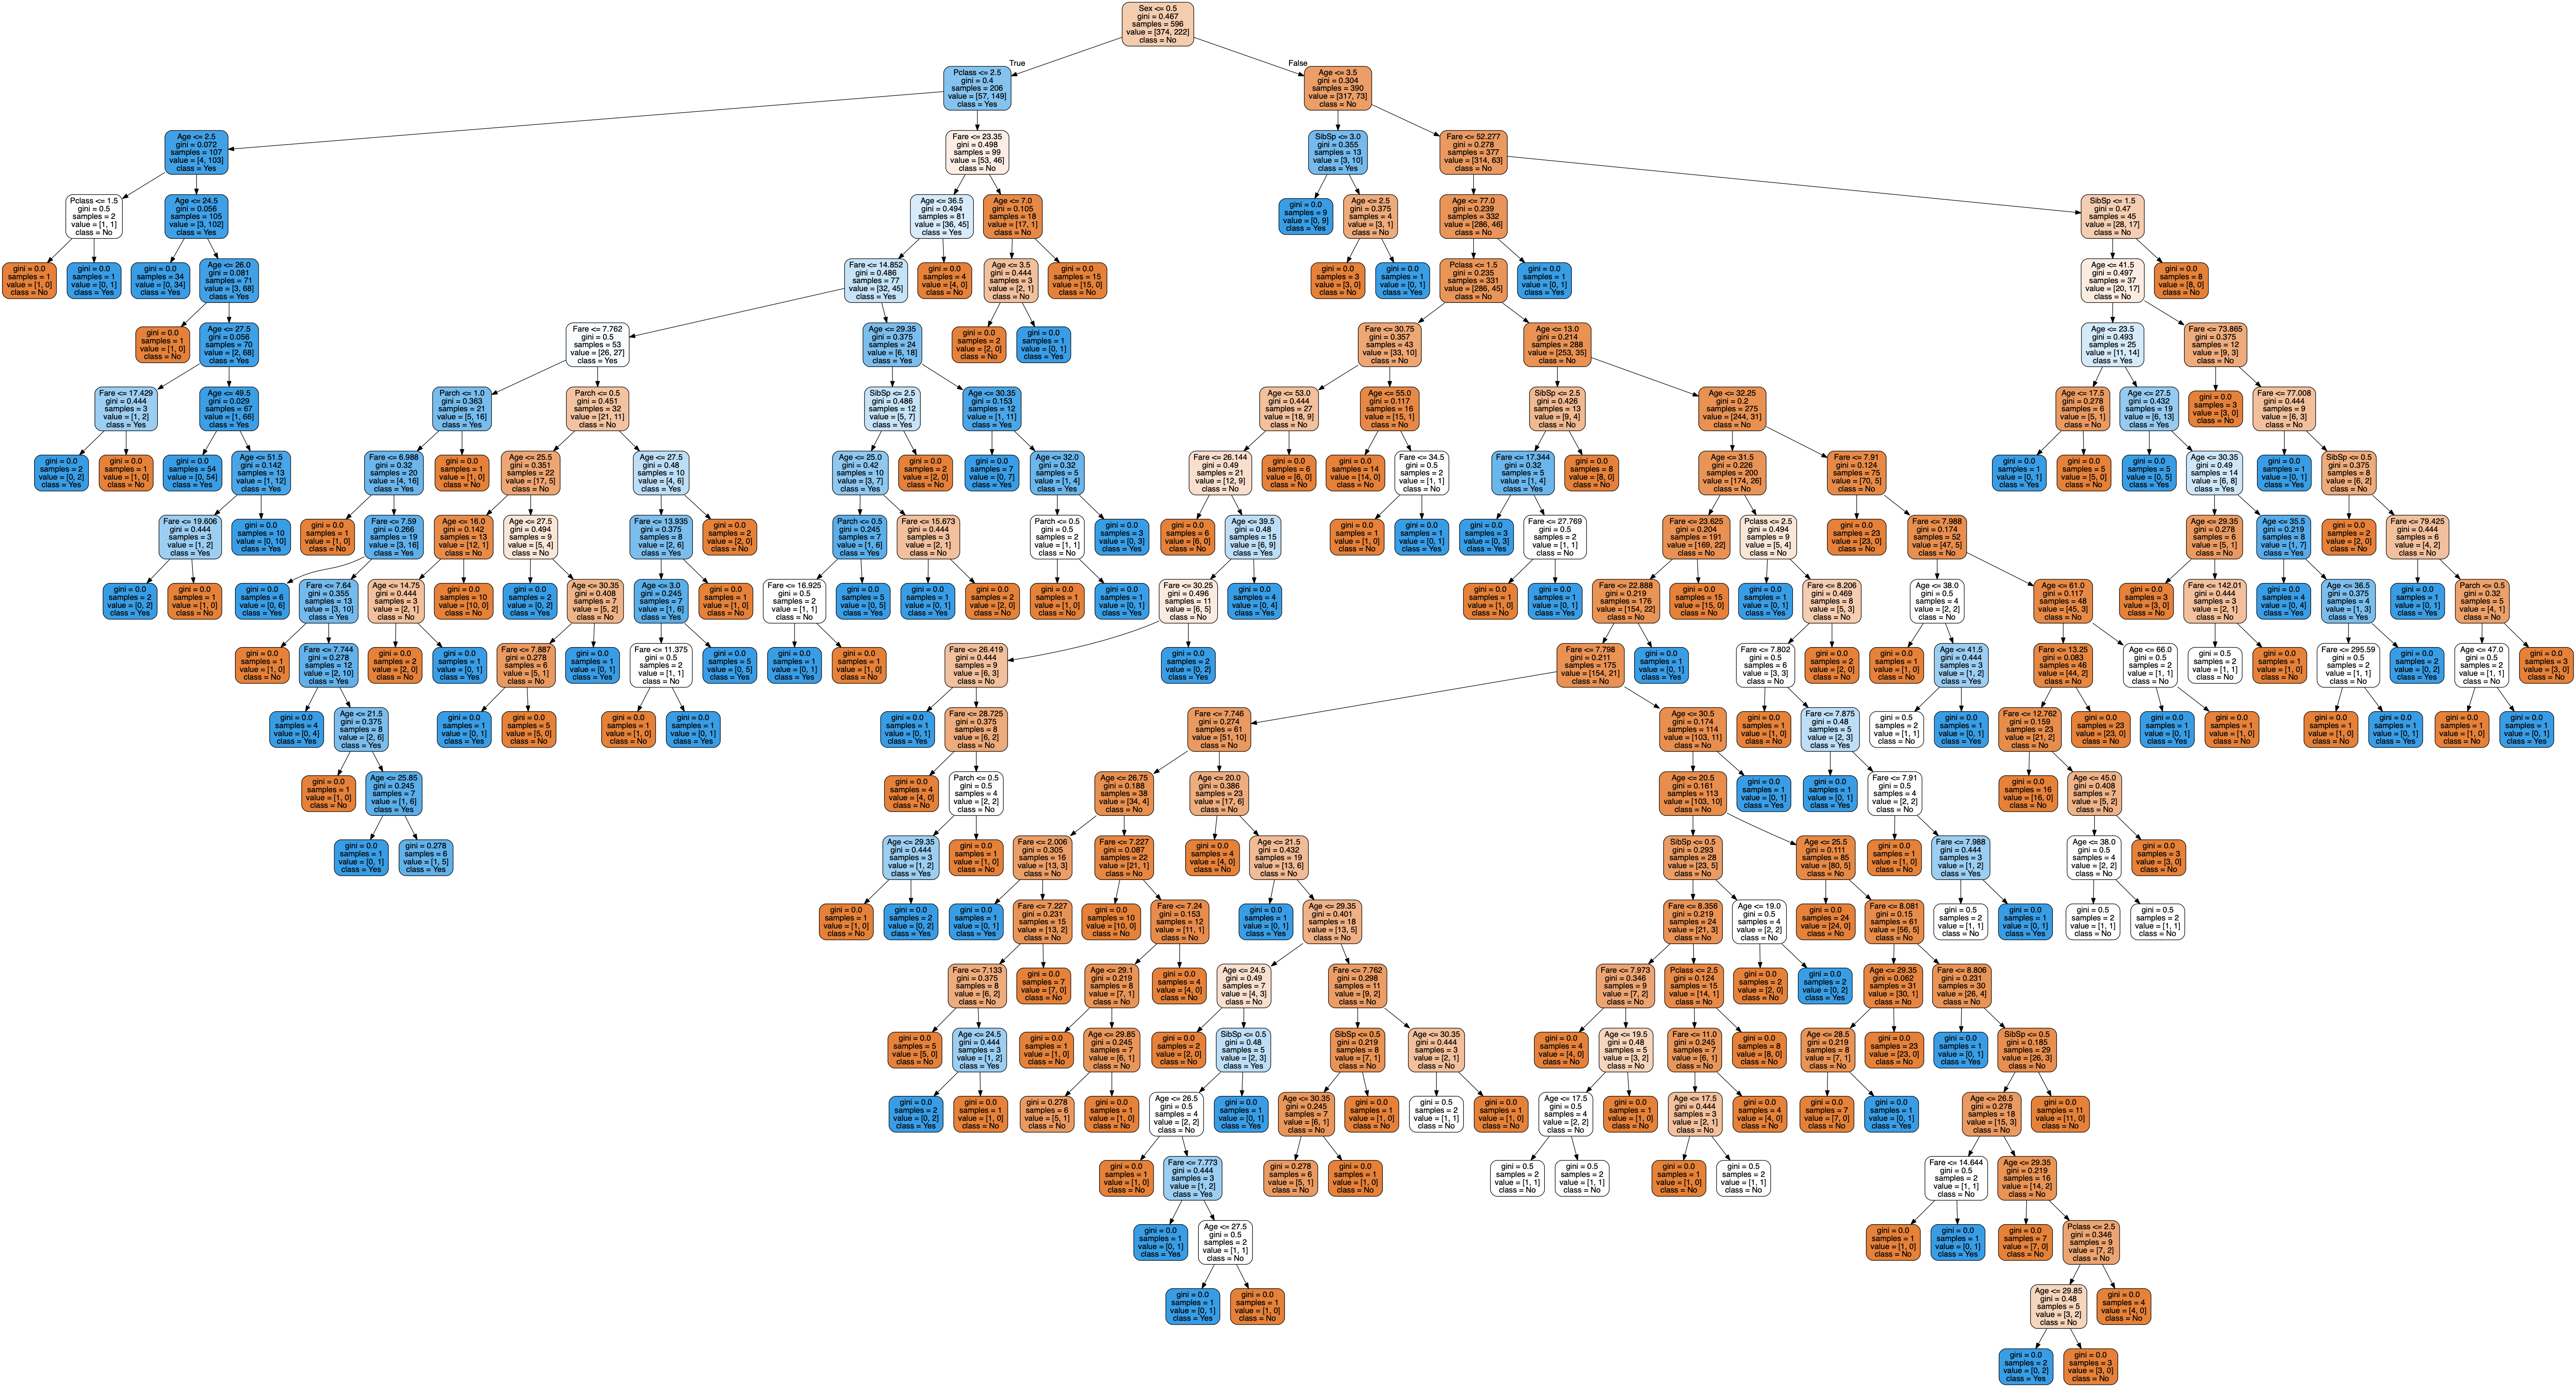

In [78]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

with open("tree1.dot", 'w') as f:
    f = tree.export_graphviz(classifier,
                            out_file=f,
                            impurity='False',
                            feature_names = x_test.columns.values,
                            class_names = ['No', 'Yes'],
                            rounded = True,
                            filled = True )
    #Convert .dot to .png to allow display in web notebook
check_call(['dot', '-Tpng', 'tree1.dot','-o','tree1.png'])
    
    #Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

### Attempt to reduce overfitting

#### It is hard to accept this model with such overfitting. Let's try to reduce overfitting by reducing depth of the tree.

In the future we can try to: add penalty, act on regularization parameters....

In [79]:
#loop through tree depths to find convergence in training and validation accuracy
classifier = DecisionTreeClassifier(max_depth = 3);
classifier.fit(x_train, y_train);

In [80]:
print('% Training accuracy for depth: ', accuracy_score(y_train, classifier.predict(x_train)))
print('Validation accuracy for depth: ', accuracy_score(y_test, classifier.predict(x_test)))

% Training accuracy for depth:  0.8238255033557047
Validation accuracy for depth:  0.8203389830508474


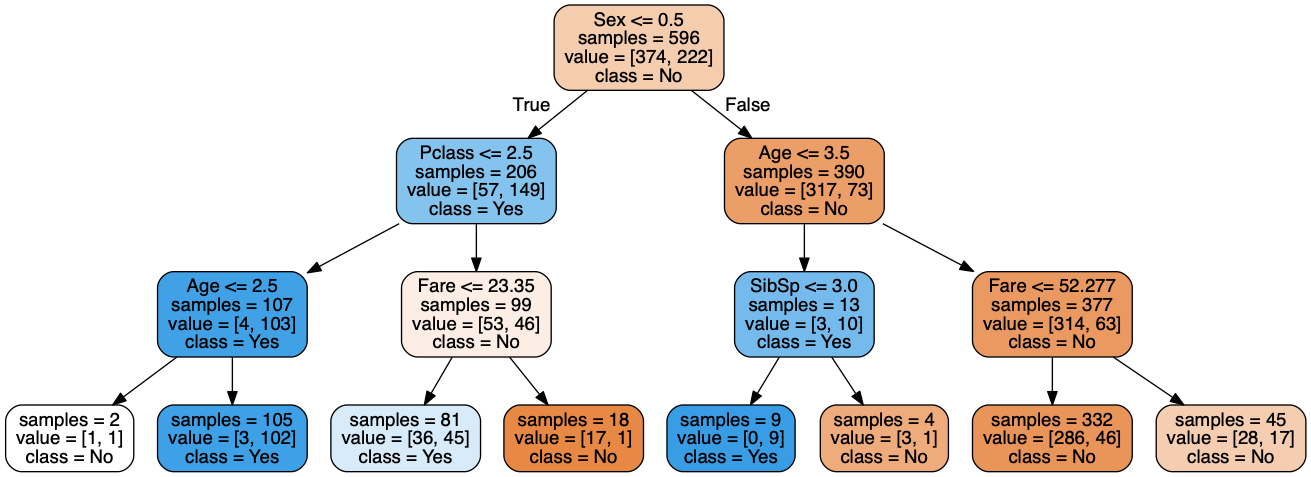

In [81]:
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(classifier,
                              out_file=f,
                              impurity = False,
                              feature_names = x_test.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

## The bluer the block is, the higher the survival rate. The browner, the lower.